## Cleaning and preparing the data for model training.  

> Performing EDA on a dataset and preparing it for modelling.

- toc:true
- branch: master
- badges: true
- comments: true
- categories: [analysis, pandas, visualization]

Problem Statement:  
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. The dataset can be found [here](https://www.kaggle.com/datasets/sdolezel/black-friday).

The dataset already consists of a train set and a test set.

What we will be doing is preparing the data for modelling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [ ]:
# import the train dataset
df_train = pd.read_csv('/content/sample_data/black_friday/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_train.shape

(550068, 12)

In [ ]:
# import the test dataset
df_test = pd.read_csv('/content/sample_data/black_friday/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_test.shape

(233599, 11)

Since we have to predict the purchase amount, the `Purchase` column is present in the test dataset.

Let's combine the train and test datasets so that we can perform data preprocessing on both the sets.

In [ ]:
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.shape

(783667, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


The purchases in the train dataset range from $12 to $23,961. Even the mean and the median values are not that far apart, with the median value being $8,047.  
The `User_ID` and `Proudct_ID` columns look like they might not be of much help for our analysis. So let's drop them from the dataframe.

In [ ]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

## Handling Categorical Values

In [ ]:
df.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


Next, let's focus on some categorical features. We have a lot of categorical features which should be converted to numerical features to be analyzed better.

#### Gender
We'll focus on the `Gender` column first. We'll map the gender to numerical values so that females are 0 and males are 1.

In [ ]:
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


#### Age
Now we'll focus on the `Age` column.

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

There are seven categories for Age. It's important to note that Age would play a big role in purchasing behavior.

In [ ]:
df['Age'].value_counts(normalize=True)

26-35    0.399423
36-45    0.199988
18-25    0.181139
46-50    0.083298
51-55    0.069907
55+      0.039020
0-17     0.027223
Name: Age, dtype: float64

As we can see, almost 40% of the users fall between 26 and 35 years of age, while only 2% are below 17. So we should probably use target ordinal encoding for this feature.

In [ ]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, 
                    '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0


#### City Category
Let's look at cities.

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
# create a dataframe of dummy values
# use drop_first=True since two categories are sufficient to represent three categories
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
# merge dataframes
df = pd.concat([df, df_city], axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


Two new columns have been added to the dataframe. The `City_Category` column can now be dropped.

In [ ]:
df.drop('City_Category', axis=1, inplace=True)

#### Stay in current city
Over to the stay column.

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We can just consider `4+` as 4 for the sake of simplicity.

In [ ]:
# replace the string
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

<ipython-input-60-eb39385380fc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')


In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

The data type is still an object though. Let's convert the column data type to integer.

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), uint8(2)
memory usage: 61.3 MB


In [ ]:
# convert data type of columns B and C too
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 71.7 MB


The categorical variables have now been handled.

## Dealing with Missing Values

Let's check for null values.

In [ ]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

The `Purchase` column will have null values because that is what we have to predict and values are present only for the train dataset. However, the missing values in the two product category columns are concerning.  
Let's explore further.

In [ ]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

Product category values are discrete in nature. The best way to replace missing values for discrete data is to replace them with the mode.

In [ ]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [ ]:
# get value 8.0
df['Product_Category_2'].mode()[0]

8.0

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [ ]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
# check if the missing values have been replaced
print(df['Product_Category_2'].isnull().sum())
print(df['Product_Category_3'].isnull().sum())

0
0


## Check for Correlations

In [ ]:
corr_matrix = df.corr()
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
C                             0.061012
Gender                        0.060346
Occupation                    0.020833
Age                           0.015839
Stay_In_Current_City_Years    0.005422
Marital_Status               -0.000463
B                            -0.019098
Product_Category_2           -0.128651
Product_Category_3           -0.185945
Product_Category_1           -0.343703
Name: Purchase, dtype: float64

Seems like the City Category C plays a huge role in the purchasing power of customers. Users from City C spend more money on products. Gender and occupation also plays a role in spending power. Suprisingly, age or marital status has little effect. The Product Category 1 has a strong negative correlation with the purchase amount, which could be because the products are cheaper in the category.

## Visualize the data


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


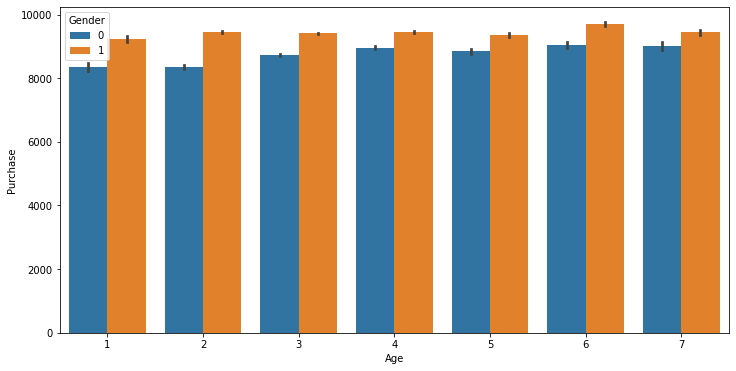

In [ ]:
# visualization by age
sns.barplot('Age', 'Purchase', hue='Gender', data=df)

#### Conclusion 1

Across all ages, men spent more on the products.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


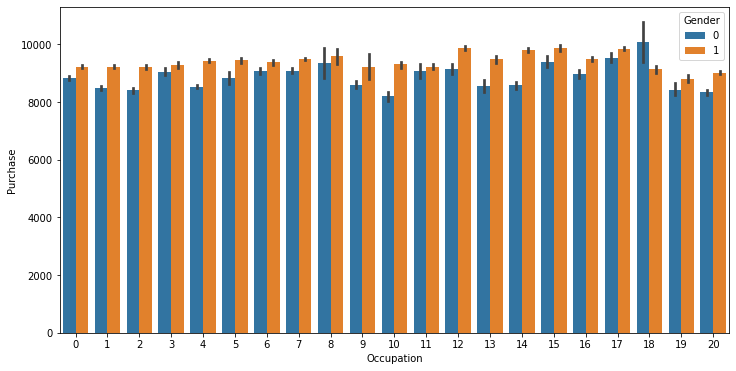

In [ ]:
# visualization by occupation
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df)

#### Conclusion 2
Only women in Occupation 18 spent more than men in the same occupation. We can conclude that men spent more irrespective of the occupation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


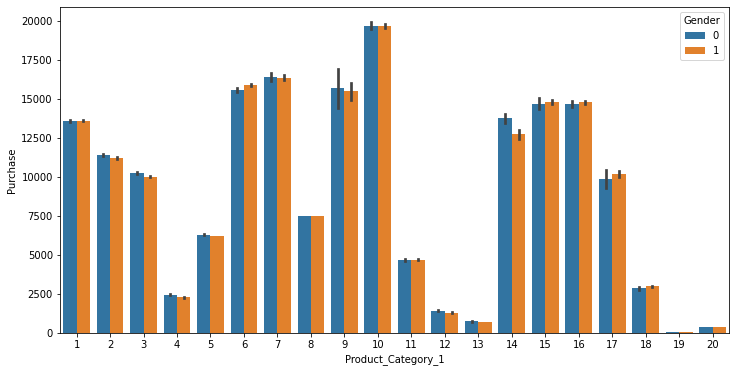

In [ ]:
# visualization by product category
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


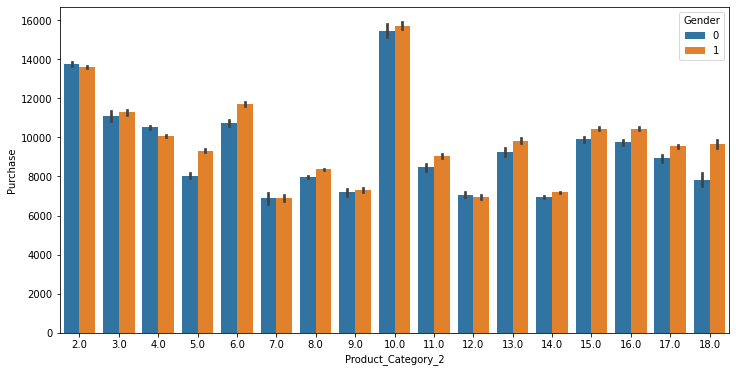

In [ ]:
# visualization by product category
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


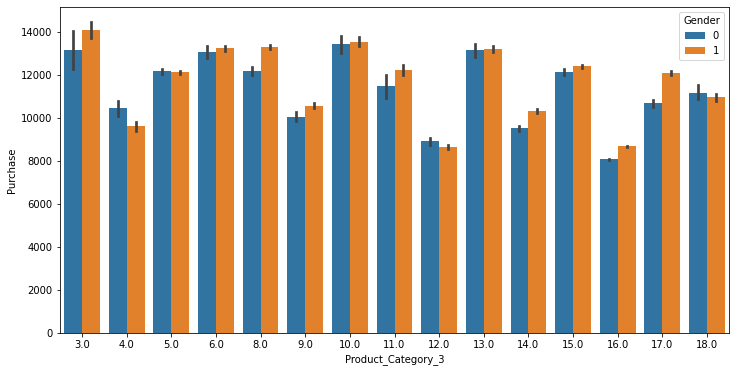

In [ ]:
# visualization by product category
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df)

#### Conclusion 3
That's interesting. Even though Product Category 1 has the most expensive product (Product 10 costs $20,000), a lot of the other products in the category have not been bought. This is probably why there is such a negative correlation in the overall purchase amount with this product category. Also, the purchasing behaviour based on gender is almost equal in this product category, which can't be said for the other product categories.

### Splitting the dataset 

Now that we are done with our feature scaling and analysis, let's split the dataset again.

In [ ]:
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

### Train/Test Split


In [ ]:
X = df_train.drop('Purchase',axis=1)
X.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0


In [ ]:
y = df_train['Purchase']
y.head(2)

0     8370.0
1    15200.0
Name: Purchase, dtype: float64

In [ ]:
print(X.shape)
print(y.shape)

(550068, 10)
(550068,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.33, random_state=42)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)